In [1]:
from typing import List, Dict
import numpy as np
import pandas as pd
from random import choices
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot as plt
import seaborn as sns

In [121]:
plt.rcParams['figure.figsize']= [8, 7]

In [122]:
# def parse_fasta_dataset(file_path: str = "../data/LTP_09_2021_compressed_staph_muscle.fasta", max_seqs:int = False) -> List[Dict[str, str]]:
def parse_fasta_dataset(file_path: str = "../data/LTP_09_2021_compressed.fasta", max_seqs:int = False) -> List[Dict[str, str]]:
# def parse_fasta_dataset(file_path: str = "../data/LTP_09_2021_aligned_staph.fasta", max_seqs:int = False) -> List[Dict[str, str]]:
    dataset = []
    current_idx = 0
    current_meta = {}
    with open(file_path, "r") as f:
        for line in f.readlines():
            if line[0] == ">":
                if current_meta != {}:
                    current_meta["sequence"] = current_meta["sequence"].strip()
                    dataset.append(current_meta)
                line_list = line.replace("\n", "").replace(">", "").split("\t")
                if len(line_list) < 2:
                    current_meta  = {key: line_list[idx] for idx, key in enumerate(["name"])}
                elif len(line_list) < 3:
                    current_meta  = {key: line_list[idx] for idx, key in enumerate(["id", "name"])}
                else:
                    current_meta  = {key: line_list[idx] for idx, key in enumerate(["id", "name", "tags"])}
                    current_meta["tags"] = current_meta["tags"].split(";")
                current_meta["sequence"] = ""
                current_idx += 1
                if current_idx > max_seqs and max_seqs>=1:
                    break
            else:
                current_meta["sequence"] += line.replace("\n", " ")
    return dataset

dataset = parse_fasta_dataset(max_seqs=-1)
print(len(dataset))

17959


In [4]:
staph_strains = [x for x in dataset if  "Staphyloc" in x['name']]

In [5]:
with open("../data/LTP_09_2021_compressed_staph.fasta", "w+") as f:
    for record in staph_strains:
#         f.write(">{id}\t{name}\t{tags}".format(id=record['id'], name=record['name'], tags=";".join(record['tags'])))
        f.write(">{id}\t{name}".format(id=record['id'], name=record['name']))
        f.write("\n")
        f.write(record['sequence'])
        f.write("\n")

In [6]:
def chunk_seq(seq: str, chunk_len: int = 4):
    ret_list = []
    chunk = ""
    for char in seq:
        chunk += char
        if len(chunk) % chunk_len ==0:
            ret_list.append(chunk)
            chunk=""
    if chunk != '':
        ret_list.append("{}{}".format(chunk, "_"*(4-len(chunk))))
    return ret_list

In [29]:
# # documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
# documents_k1 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 1)), [x["name"]]) for x in dataset]

# model_k1 = Doc2Vec(
#     documents=documents_k1,
#     epochs=20,
#     workers=8,
#     vector_size=64,
# )

In [74]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k2 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 2)), [x["name"]]) for x in dataset]

model_k2 = Doc2Vec(
    documents=documents_k2,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [75]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k3 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 3)), [x["name"]]) for x in dataset]

model_k3 = Doc2Vec(
    documents=documents_k3,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [76]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k5 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 5)), [x["name"]]) for x in dataset]

model_k5 = Doc2Vec(
    documents=documents_k5,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [77]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k7 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 7)), [x["name"]]) for x in dataset]

model_k7 = Doc2Vec(
    documents=documents_k7,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [78]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k11 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 11)), [x["name"]]) for x in dataset]

model_k11 = Doc2Vec(
    documents=documents_k11,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [79]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k13 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 13)), [x["name"]]) for x in dataset]

model_k13 = Doc2Vec(
    documents=documents_k13,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [80]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k17 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 17)), [x["name"]]) for x in dataset]

model_k17 = Doc2Vec(
    documents=documents_k17,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [86]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k19 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 19)), [x["name"]]) for x in dataset]

model_k19 = Doc2Vec(
    documents=documents_k19,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [108]:
# documents = [TaggedDocument(chunk_seq(x["sequence"].replace(" ", ""), 15), [x["name"]]) for x in dataset]
documents_k31 = [TaggedDocument(" ".join(chunk_seq(x["sequence"].replace(" ", ""), 31)), [x["name"]]) for x in dataset]

model_k31 = Doc2Vec(
    documents=documents_k31,
    epochs=50,
    workers=8,
    vector_size=64,
    hs=1,
    dbow_words=1,
)

In [134]:
seq_ids = {
    record["name"]: np.concatenate(
        [
            # model_k1.dv[record["name"]], 
            model_k2.dv[record["name"]],
            model_k3.dv[record["name"]],
            # model_k5.dv[record["name"]],
            # model_k7.dv[record["name"]],
            model_k11.dv[record["name"]],
            # model_k13.dv[record["name"]],
            # model_k17.dv[record["name"]],
            model_k19.dv[record["name"]],
            model_k31.dv[record["name"]],
        ]
    )
    for record in staph_strains
}

In [135]:
def plot_nodes(seq_ids: Dict[str, np.array], figsize=(50,50)):
    X = np.array([x for x in seq_ids.values()])
    # reduce dimensions to 2
    # pca = TSNE(n_components=2, n_jobs=-1)
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    cluster = AffinityPropagation(random_state=42)
    cluster.fit(X)

    plt.figure(figsize=figsize)
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1], c=cluster.labels_, cmap=sns.color_palette("Spectral", as_cmap=True))
    for i, word in enumerate(seq_ids):
        c = 'black' if i in cluster.cluster_centers_indices_ else 'grey'
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), c=c)
    plt.show()

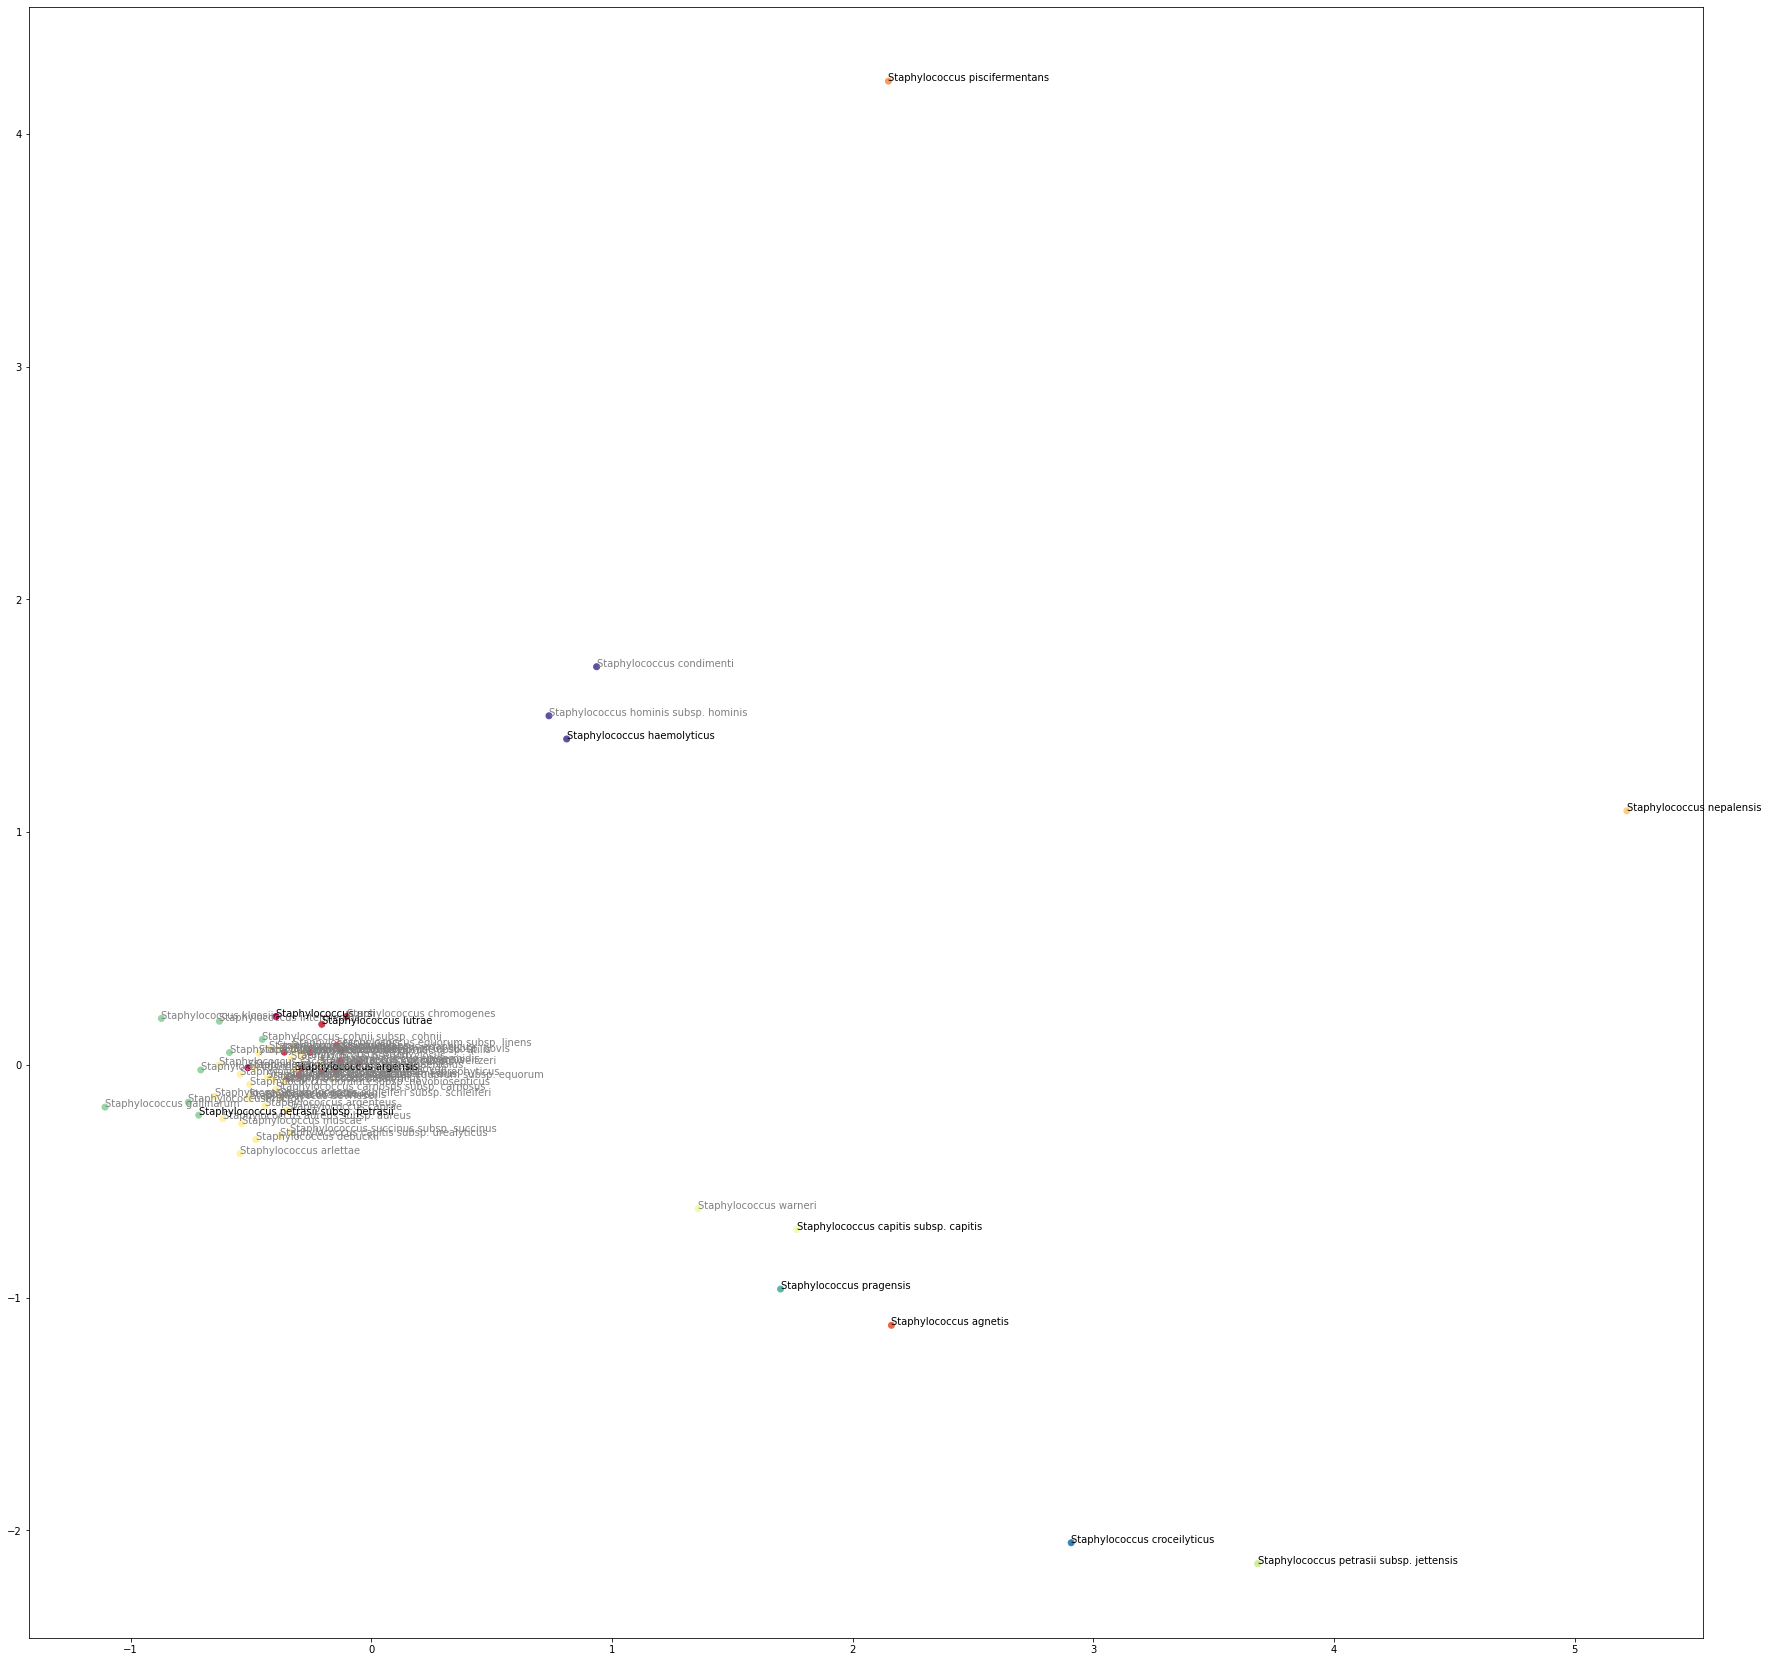

In [136]:
# random_sample = choices([{key: val} for key, val in seq_ids.items()], k=500)
random_sample = [{x['name']: seq_ids[x['name']]} for x in staph_strains]

random_sample_dict = {}
for item in random_sample:
    for key, val in item.items():
        random_sample_dict[key] = val
        
plot_nodes(random_sample_dict, figsize=(30, 30))

In [137]:
from sklearn.metrics import pairwise_distances

euclidian_distance = pairwise_distances(X=np.array([x for x in seq_ids.values()]), metric='euclidean')
cosine_distance = pairwise_distances(X=np.array([x for x in seq_ids.values()]), metric='cosine')
l1_distance = pairwise_distances(X=np.array([x for x in seq_ids.values()]), metric='l1')
chebyshev_distance = pairwise_distances(X=np.array([x for x in seq_ids.values()]), metric='chebyshev')

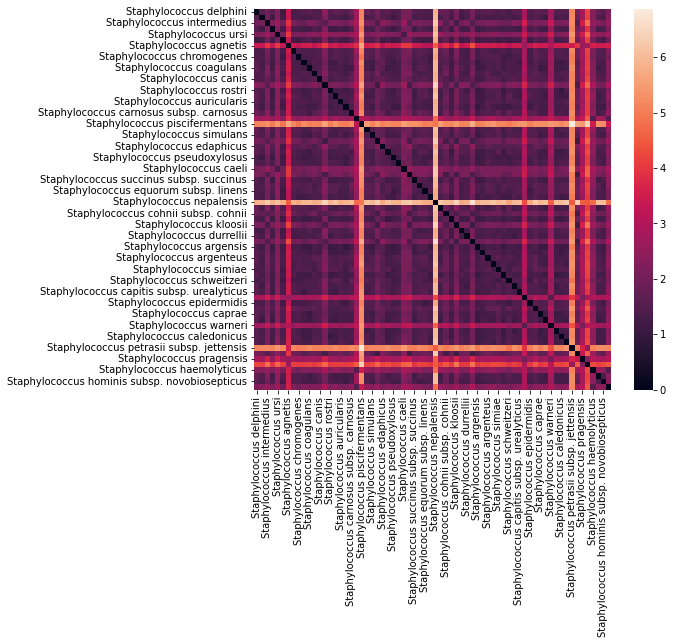

In [138]:
euclidian_distance_matrix = pd.DataFrame(euclidian_distance, index=seq_ids.keys(), columns=seq_ids.keys())
sns.heatmap(euclidian_distance_matrix)
plt.show()

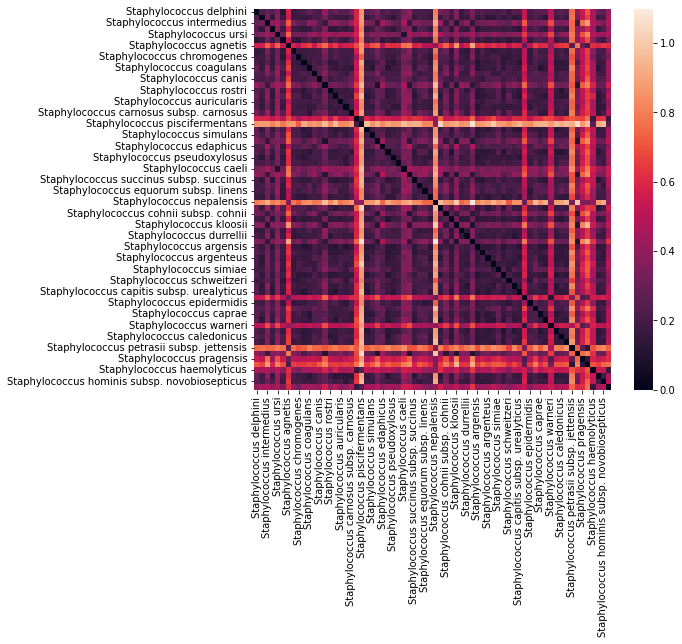

In [139]:
cosine_distance_matrix = pd.DataFrame(cosine_distance, index=seq_ids.keys(), columns=seq_ids.keys())
sns.heatmap(cosine_distance_matrix)
plt.show()

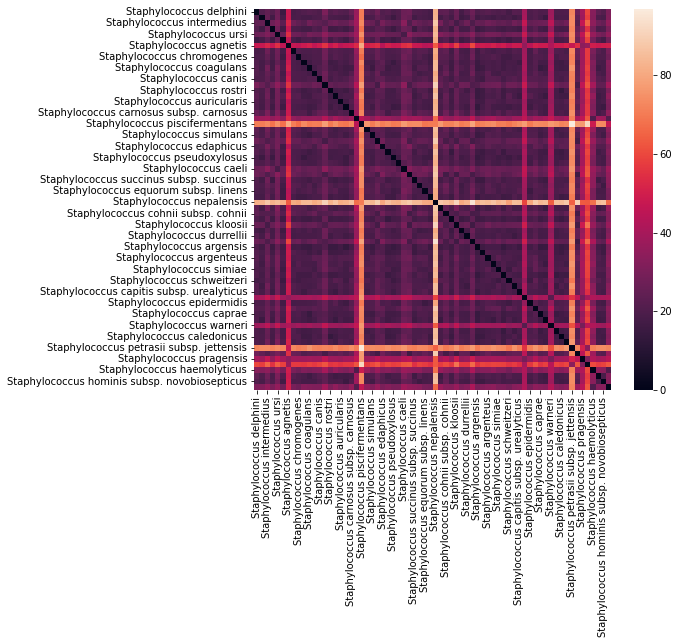

In [140]:
l1_distance_matrix = pd.DataFrame(l1_distance, index=seq_ids.keys(), columns=seq_ids.keys())
sns.heatmap(l1_distance_matrix)
plt.show()

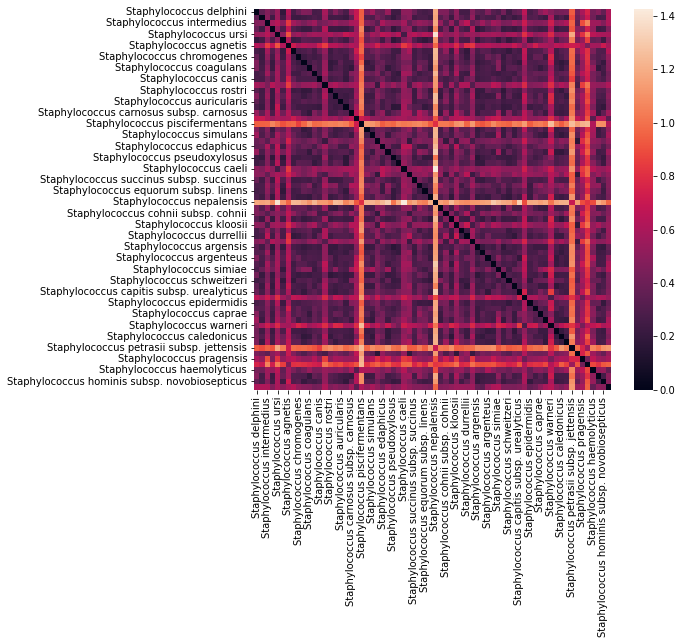

In [141]:
chebyshev_distance_matrix = pd.DataFrame(chebyshev_distance, index=seq_ids.keys(), columns=seq_ids.keys())
sns.heatmap(chebyshev_distance_matrix)
plt.show()

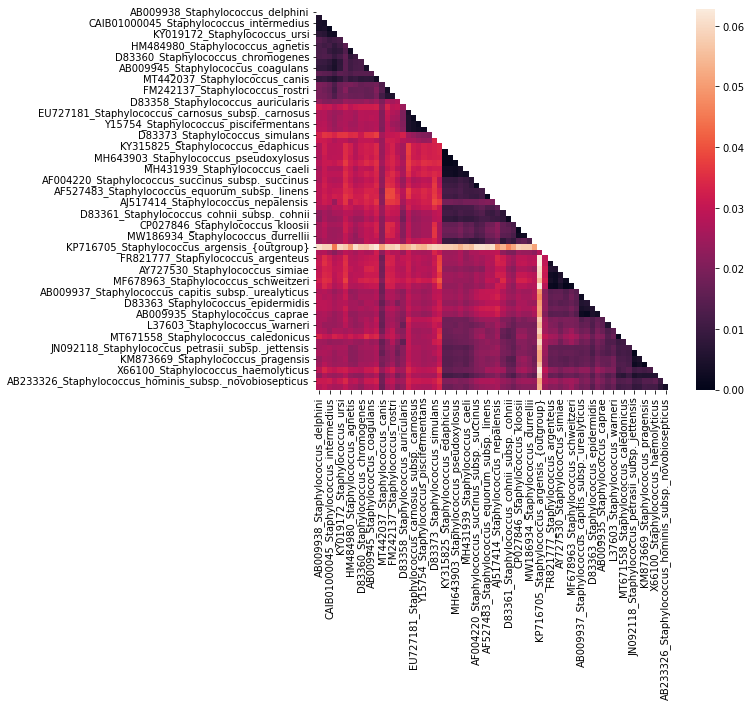

In [142]:
sns.heatmap(pd.read_csv("../data/LTP_09_2021_compressed_staph_distance_matrix.csv", index_col=0))
plt.show()

In [143]:
# Importing necessary libraries from BioPython
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix

In [144]:
euc_lower = [
    row[: idx + 1] for idx, row in enumerate(euclidian_distance.tolist())
]

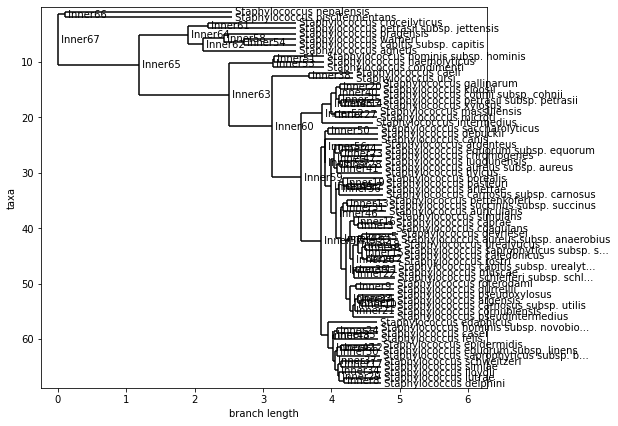

In [145]:

# Calculate the distance matrix
distMatrix = DistanceMatrix([str(x) for x in seq_ids.keys()], euc_lower)

# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
tree = constructor.upgma(distMatrix)
# Construct the phlyogenetic tree using NJ algorithm
# tree = constructor.nj(distMatrix)

# Draw the phlyogenetic tree
Phylo.draw(tree)

# Draw the phlyogenetic tree using terminal
# Phylo.draw_ascii(tree)